# 202131053_NURSALSABILA ALI

## Import Library

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image
from rembg import remove
from matplotlib import pyplot as plt

## Read and Show Image

Text(0.5, 1.0, 'Original Image')

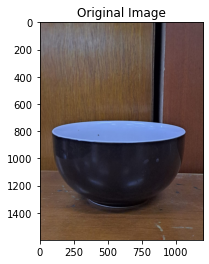

In [2]:
image = cv.imread ("input.jpg")
rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.title('Original Image')

## Convert Image to Binary with Thresholding Method

In [3]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 2, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

## Contour from Binary

In [4]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

## Mask

In [5]:
mask = np.zeros(image.shape[:2], np.uint8)

## Contour Image on Mask

In [6]:
cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Merge the Original Images with Masks Using the Bitwise AND Operator

In [7]:
rmv = cv.bitwise_and(image, image, mask=mask)

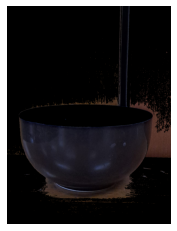

In [8]:
img = cv.cvtColor(rmv, cv.COLOR_RGB2BGR)
plt.imshow(img)
plt.axis('off')
plt.show()

## Remove Background

Text(0.5, 1.0, 'Backgorund Removed')

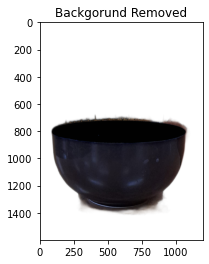

In [9]:
output = remove(img)

plt.imshow(output)
plt.title('Backgorund Removed')

Text(0.5, 1.0, 'After Background Removed')

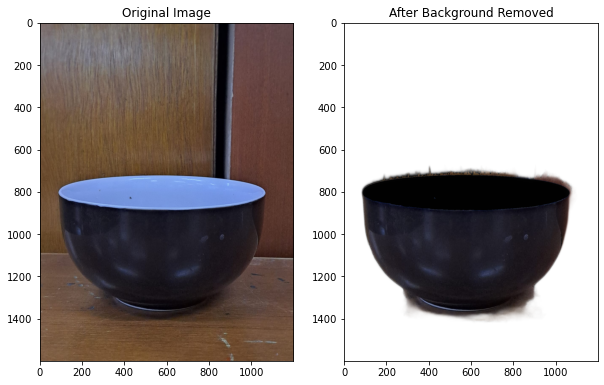

In [10]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(rgb)
ax[0].set_title("Original Image")
ax[1].imshow(output)
ax[1].set_title("After Background Removed")

## Save Image

In [11]:
cv.imwrite("output.png", output)

True